Flight Price

In [3]:
# Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the
# dataset have?

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df = pd.read_excel('flight_price.xlsx')

In [10]:
df.shape

(10683, 11)

In [11]:
# Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the
# distribution.

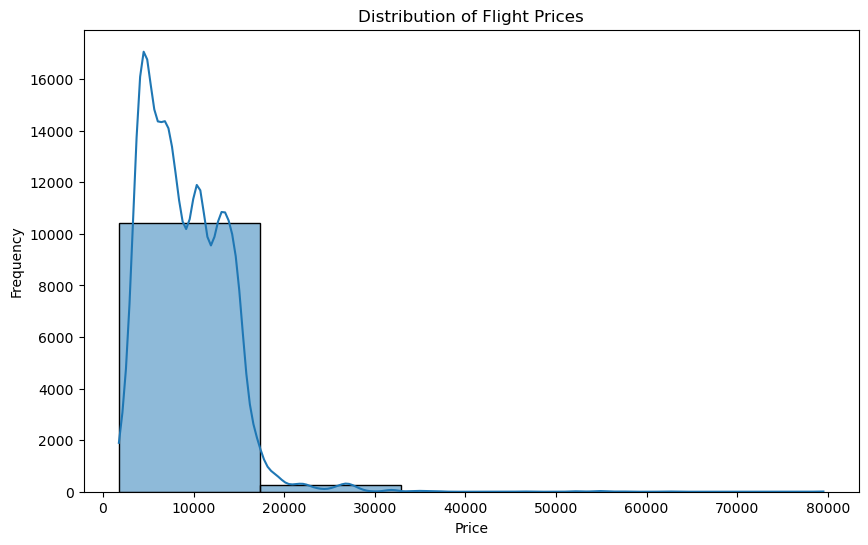

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=5, kde=True)  # bins can be adjusted
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [13]:
# Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

In [14]:
min_price = df['Price'].min()
max_price = df['Price'].max()

In [15]:
price_range = max_price - min_price

In [16]:
price_range

77753

In [17]:
# Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different
# airlines.

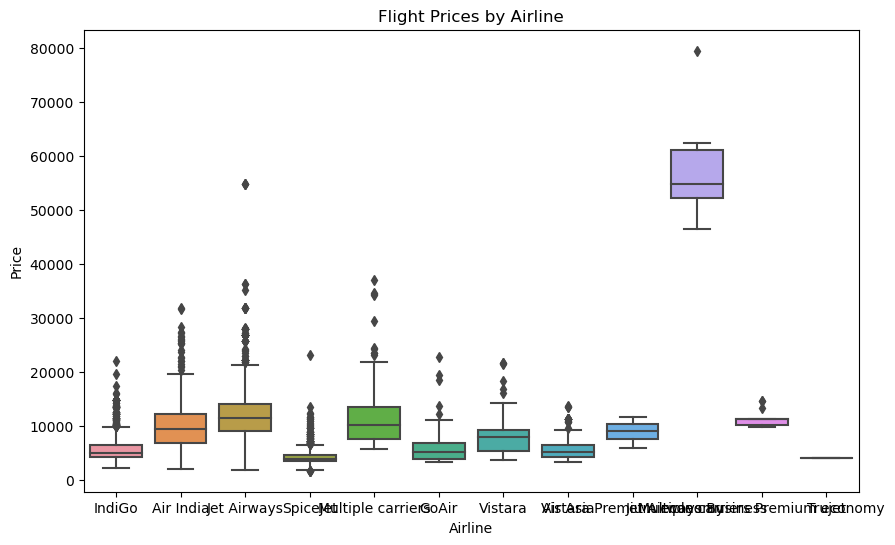

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Airline', y='Price')
plt.title('Flight Prices by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.show()

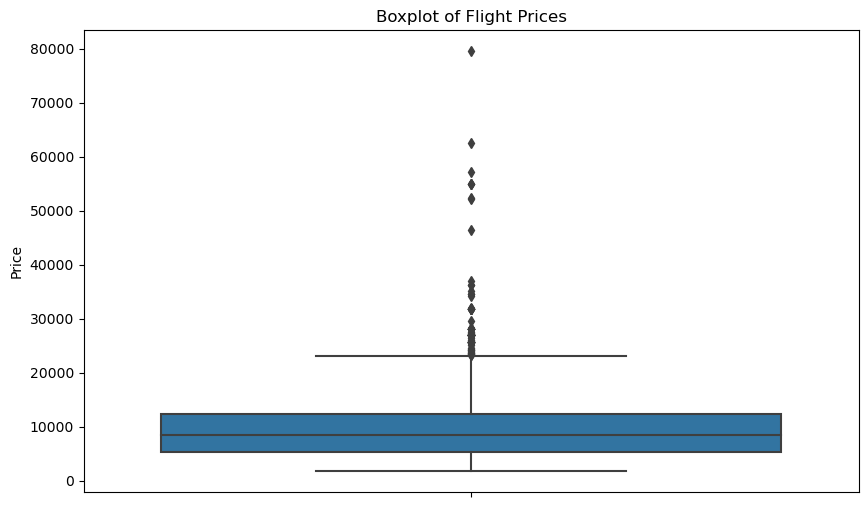

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='Price')  
plt.title('Boxplot of Flight Prices')
plt.ylabel('Price')
plt.show()

In [20]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [21]:
outliers = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]

In [22]:
outliers

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
123,Air India,1/03/2019,Delhi,Cochin,DEL → BOM → COK,23:00,19:15 02 Mar,20h 15m,1 stop,No info,27430
396,Multiple carriers,1/03/2019,Delhi,Cochin,DEL → BOM → COK,12:50,19:15,6h 25m,1 stop,No info,36983
486,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,15:15,6h 20m,1 stop,No info,26890
510,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,07:00,12:25,5h 25m,1 stop,No info,26890
597,Air India,6/03/2019,Mumbai,Hyderabad,BOM → JDH → DEL → HYD,09:40,15:15 07 Mar,29h 35m,2 stops,No info,25139
...,...,...,...,...,...,...,...,...,...,...,...
10353,Jet Airways,6/03/2019,Mumbai,Hyderabad,BOM → BDQ → DEL → HYD,19:50,16:50 07 Mar,21h,2 stops,No info,24210
10364,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209
10383,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,07:00,05:05 02 Mar,22h 5m,1 stop,No info,26890
10439,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:40,09:00 02 Mar,14h 20m,1 stop,No info,31825


In [24]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [25]:
# Convert 'Date_of_Journey' to datetime
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')
df['Month'] = df['Date_of_Journey'].dt.to_period('M')
df['Year'] = df['Date_of_Journey'].dt.year

In [26]:
# Calculate average price per month
monthly_prices = df.groupby('Month')['Price'].mean().reset_index()
monthly_prices['Month'] = monthly_prices['Month'].astype(str)

In [27]:
monthly_flights = df.groupby('Month')['Airline'].count().reset_index()
monthly_flights['Month'] = monthly_flights['Month'].astype(str)

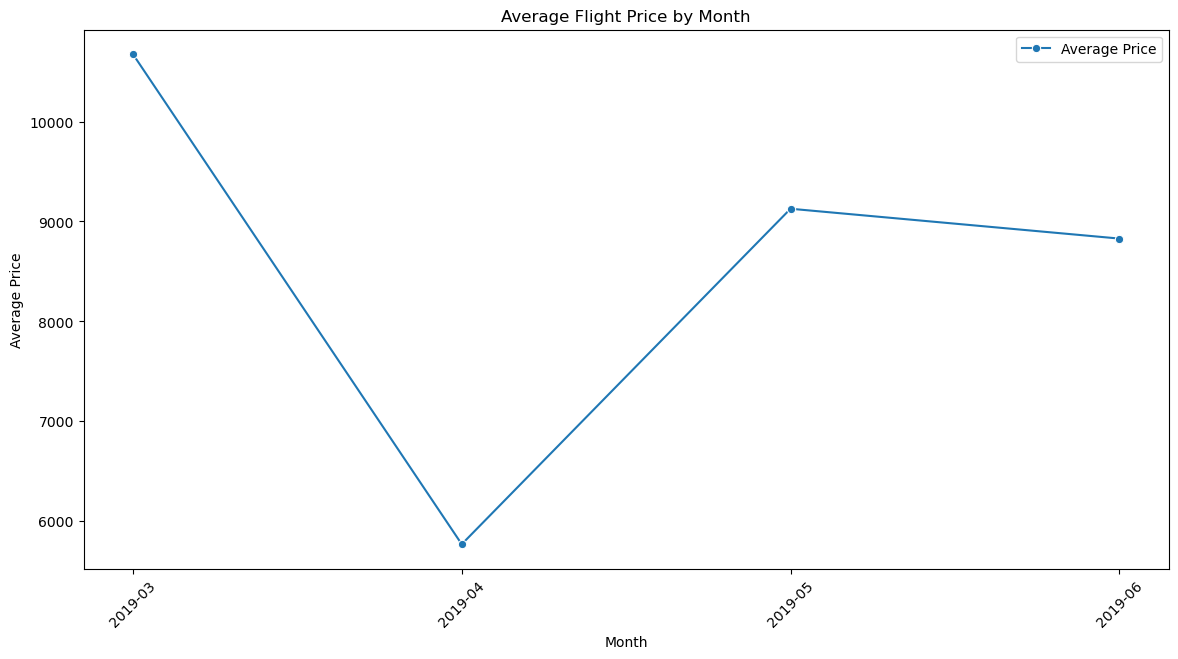

In [29]:
# Plot average price per month
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_prices, x='Month', y='Price', marker='o', label='Average Price')
plt.title('Average Flight Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()

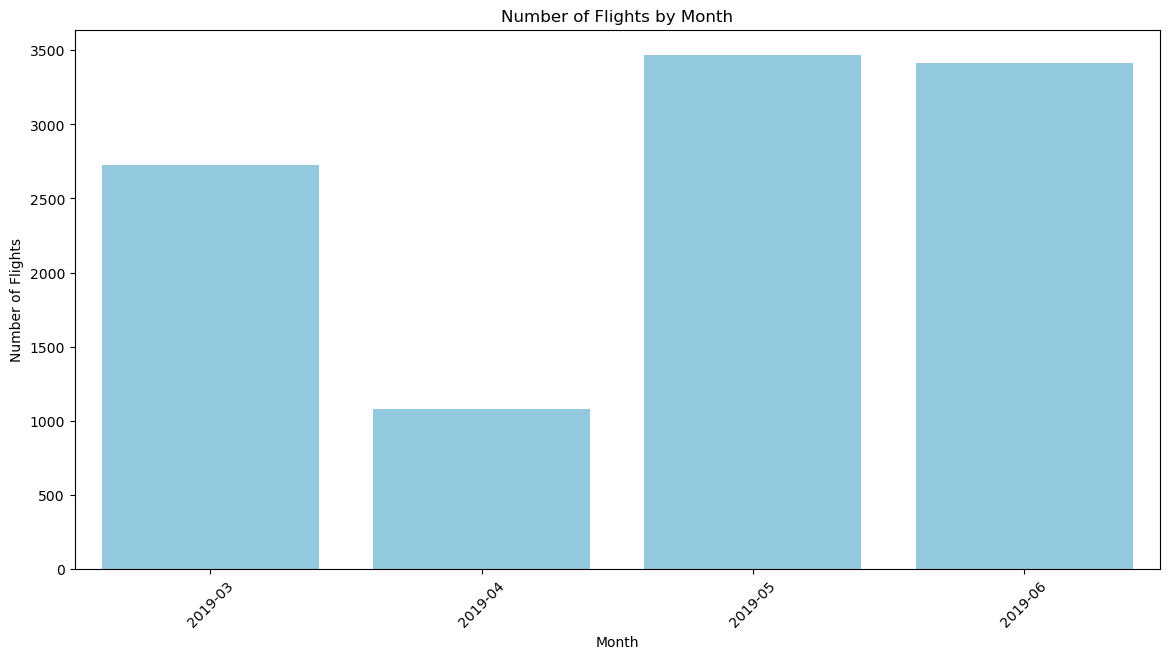

In [30]:
# Plot number of flights per month
plt.figure(figsize=(14, 7))
sns.barplot(data=monthly_flights, x='Month', y='Airline', color='skyblue')
plt.title('Number of Flights by Month')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.show()

In [31]:
# Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight
# Price dataset to identify any trends in flight prices. What features would you analyze to identify these
# trends, and what visualizations would you use to present your findings to your team?

In [35]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
df['Month'] = df['Date_of_Journey'].dt.month
df['Year'] = df['Date_of_Journey'].dt.year

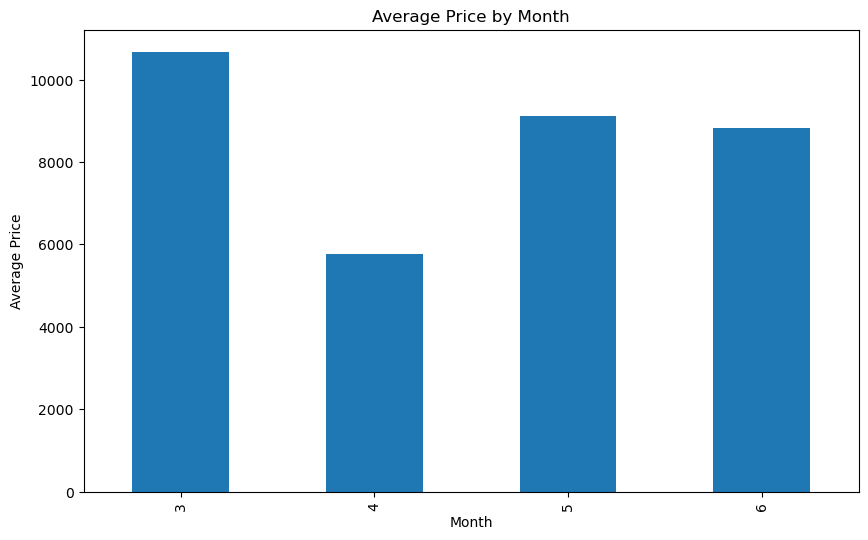

In [36]:
monthly_prices = df.groupby('Month')['Price'].mean()
plt.figure(figsize=(10, 6))
monthly_prices.plot(kind='bar')
plt.title('Average Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.show()

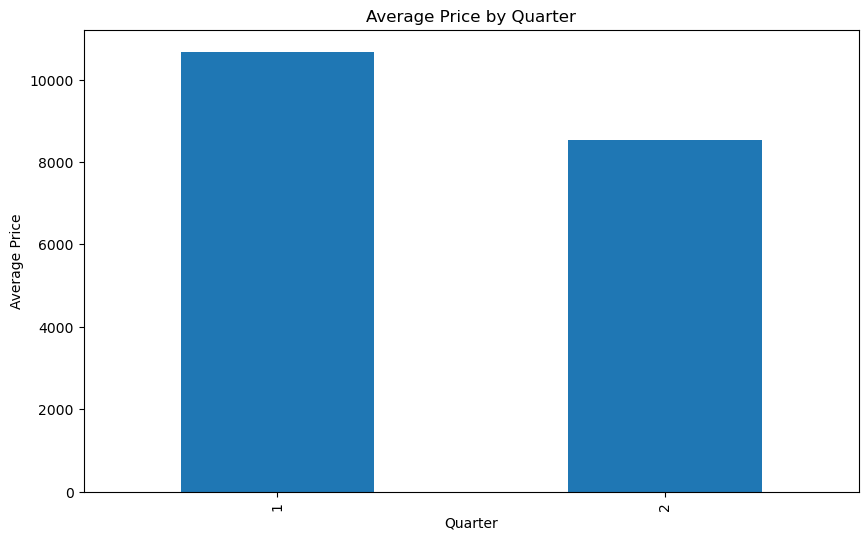

In [37]:
df['Quarter'] = df['Date_of_Journey'].dt.quarter
quarterly_prices = df.groupby('Quarter')['Price'].mean()
plt.figure(figsize=(10, 6))
quarterly_prices.plot(kind='bar')
plt.title('Average Price by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Average Price')
plt.show()

In [38]:
# Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight
# Price dataset to identify any trends in flight prices. What features would you analyze to identify these
# trends, and what visualizations would you use to present your findings to your team?

In [40]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

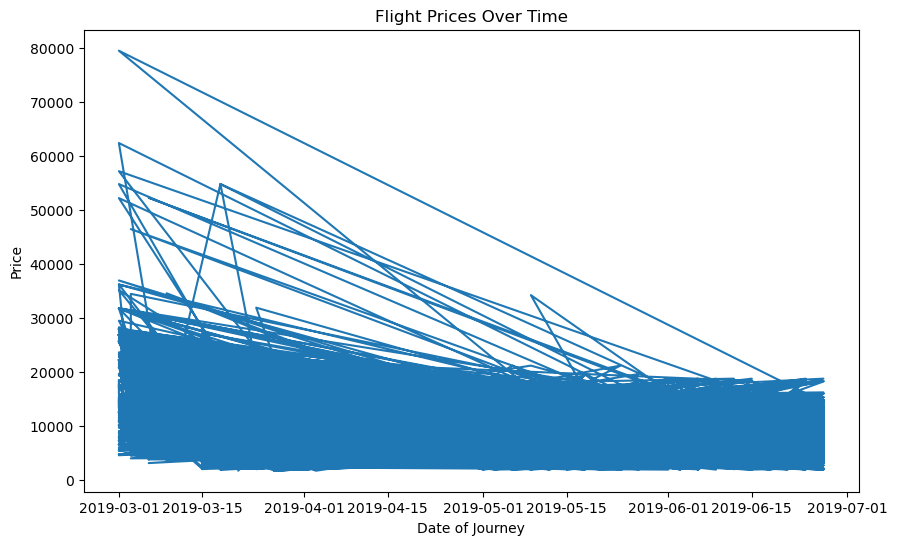

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date_of_Journey'], df['Price'])
plt.title('Flight Prices Over Time')
plt.xlabel('Date of Journey')
plt.ylabel('Price')
plt.show()

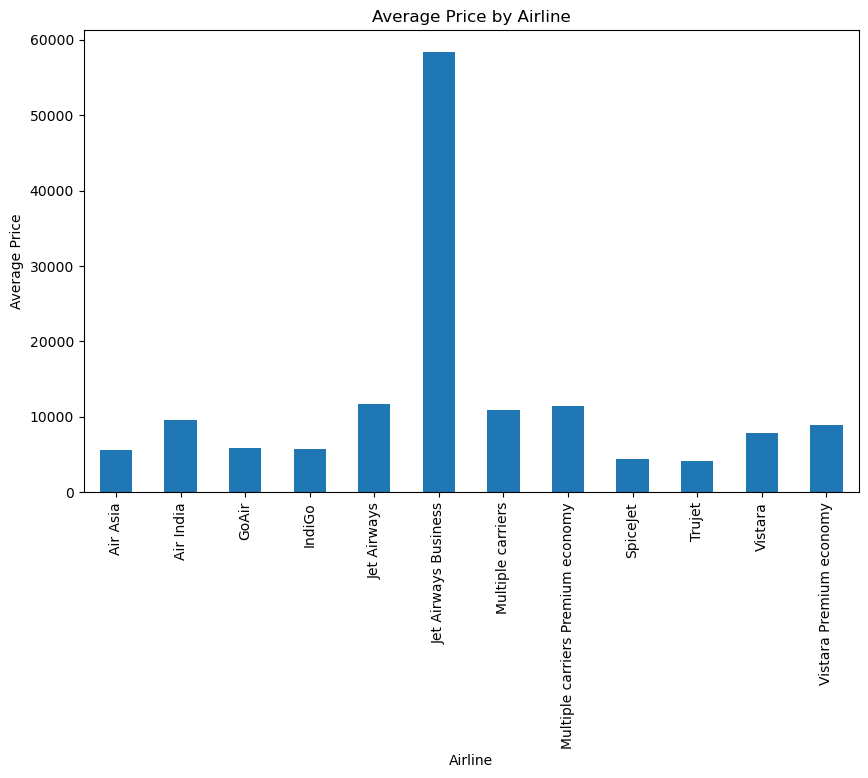

In [42]:
airline_prices = df.groupby('Airline')['Price'].mean()
plt.figure(figsize=(10, 6))
airline_prices.plot(kind='bar')
plt.title('Average Price by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.show()

In [43]:
# Q8. You are a data scientist working for an airline company, and you have been asked to analyze the
# Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to
# identify these factors, and how would you present your findings to the management team?

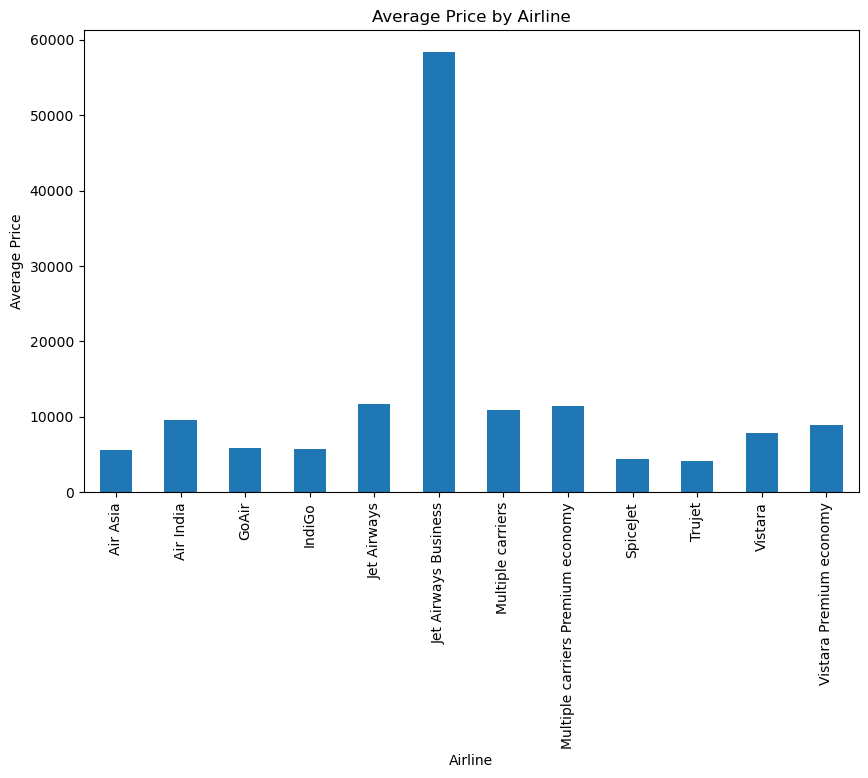

In [44]:
# Analyze prices by airline
airline_prices = df.groupby('Airline')['Price'].mean()
plt.figure(figsize=(10, 6))
airline_prices.plot(kind='bar')
plt.title('Average Price by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.show()


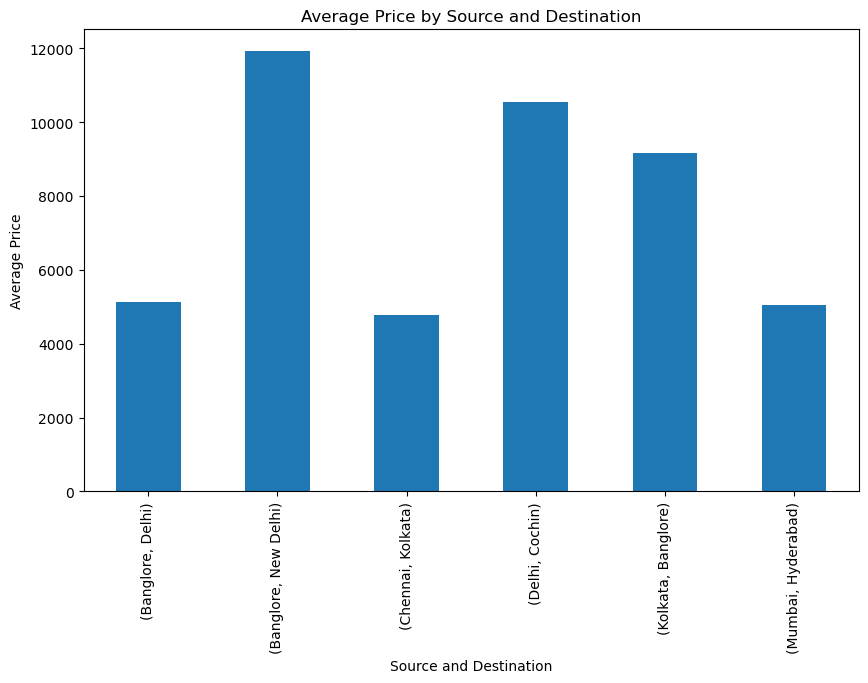

In [45]:
# Analyze prices by source and destination
source_destination_prices = df.groupby(['Source', 'Destination'])['Price'].mean()
plt.figure(figsize=(10, 6))
source_destination_prices.plot(kind='bar')
plt.title('Average Price by Source and Destination')
plt.xlabel('Source and Destination')
plt.ylabel('Average Price')
plt.show()

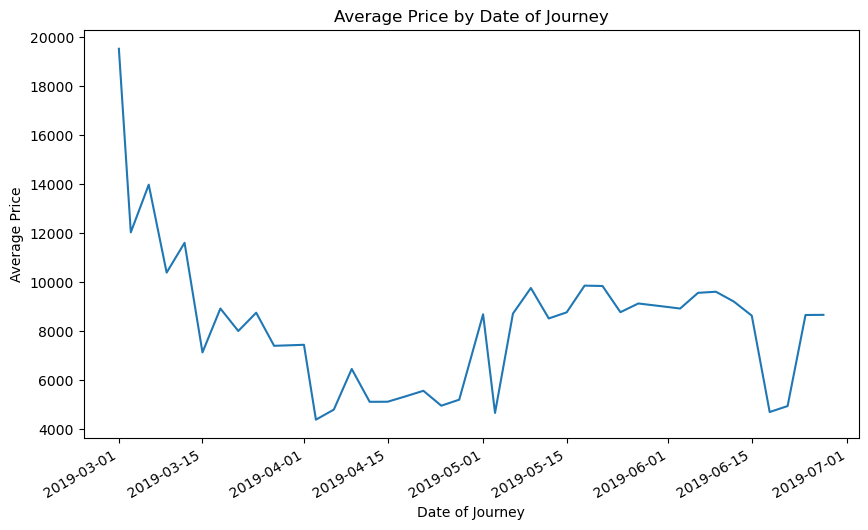

In [46]:
# Analyze prices by date of journey
date_of_journey_prices = df.groupby('Date_of_Journey')['Price'].mean()
plt.figure(figsize=(10, 6))
date_of_journey_prices.plot(kind='line')
plt.title('Average Price by Date of Journey')
plt.xlabel('Date of Journey')
plt.ylabel('Average Price')
plt.show()

Google Playstore:

In [50]:
# Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does
# the dataset have?

In [51]:
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [52]:
df.shape

(10841, 13)

In [53]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

In [54]:
df = df.dropna(subset=['Rating'])

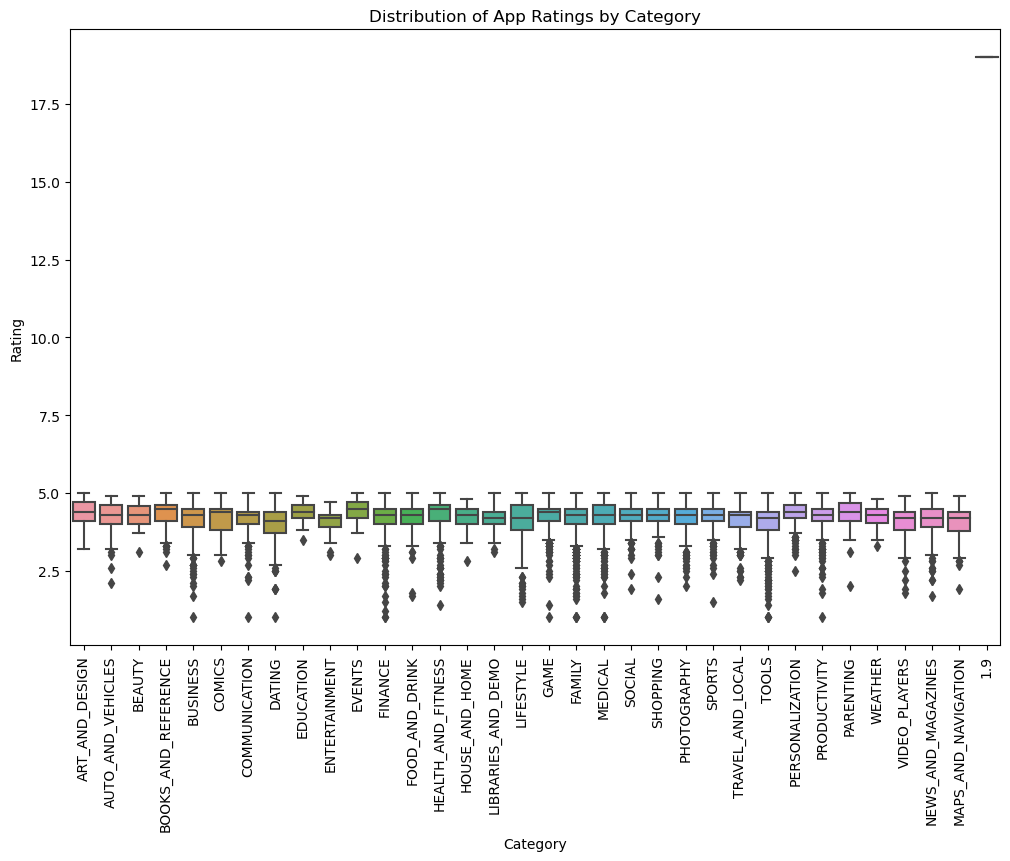

In [55]:
# Create a boxplot to compare ratings by category
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Category', y='Rating')
plt.xticks(rotation=90)  # Rotate category labels for better readability
plt.title('Distribution of App Ratings by Category')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.show()

In [56]:
# Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may
# impact your analysis.

In [57]:
missing_values = df.isnull().sum()

In [58]:
missing_values

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [61]:
# Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize
# the relationship.

In [63]:
def convert_size(size_str):
    if 'M' in size_str:
        return float(size_str.replace('M', '').strip())  # Convert to float
    elif 'k' in size_str:
        return float(size_str.replace('k', '').strip()) / 1000  # Convert to thousands of units
    return None

In [64]:
df['Size'] = df['Size'].apply(convert_size)

In [66]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

In [67]:
df = df.dropna(subset=['Size', 'Rating'])

<function matplotlib.pyplot.show(close=None, block=None)>

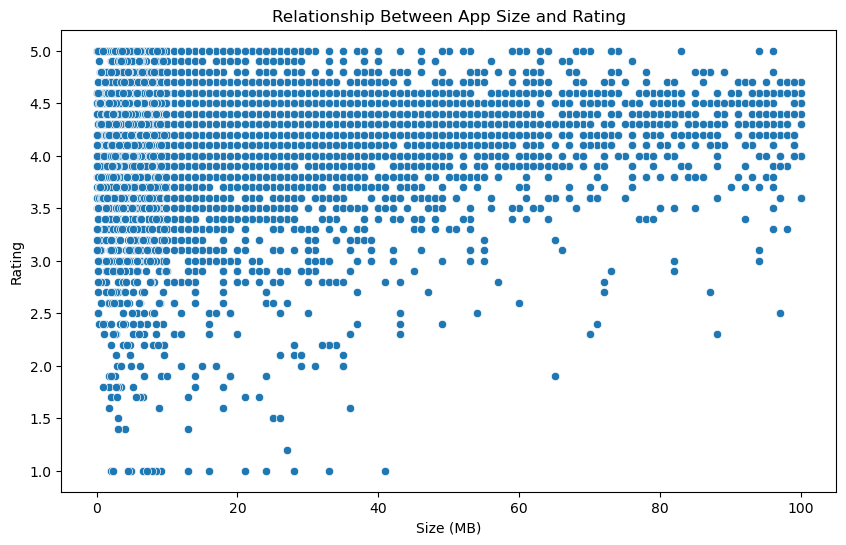

In [68]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Size', y='Rating')
plt.title('Relationship Between App Size and Rating')
plt.xlabel('Size (MB)')
plt.ylabel('Rating')
plt.show

In [69]:
# Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

In [71]:
df['Price'] = df['Price'].apply(lambda x: float(x.replace('$', '').replace(',', '').strip()) if isinstance(x, str) else x)

In [72]:
df = df.dropna(subset=['Price', 'Type'])

In [73]:
average_price_by_type = df.groupby('Type')['Price'].mean().reset_index()

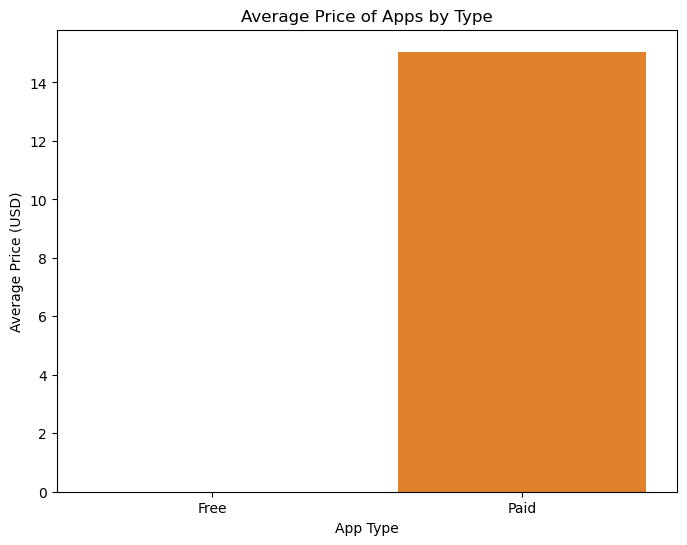

In [74]:
# Create a bar chart to compare average prices by app type
plt.figure(figsize=(8, 6))
sns.barplot(data=average_price_by_type, x='Type', y='Price')
plt.title('Average Price of Apps by Type')
plt.xlabel('App Type')
plt.ylabel('Average Price (USD)')
plt.show()

In [75]:
# Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps
# with the highest number of installs.

In [76]:
df['Installs'] = df['Installs'].apply(lambda x: int(x.replace(',', '').replace('+', '').strip()) if isinstance(x, str) else x)

In [77]:
df = df.dropna(subset=['Installs'])

In [79]:
df_sorted = df.sort_values(by='Installs', ascending=False)

In [80]:
top_10_apps = df_sorted.head(10)

In [81]:
frequency_table = top_10_apps[['App', 'Installs']]

In [82]:
frequency_table

,App,Installs
1917,Subway Surfers,1000000000
9844,Google News,1000000000
1750,Subway Surfers,1000000000
3816,Google News,1000000000
3896,Subway Surfers,1000000000
1654,Subway Surfers,1000000000
1872,Subway Surfers,1000000000
3765,Google News,1000000000
3736,Google News,1000000000
1700,Subway Surfers,1000000000
